In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

covid_data = pd.read_csv("covid_19_data.csv",parse_dates=["ObservationDate","Last Update"])
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [2]:
covid_data.shape

(52469, 8)

In [3]:
covid_data.info()
#We see that the type for columns "Confirmed","Recovered" and "Deaths" are float64.Lets Convert them into int64 as people can't be in decimals.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52469 entries, 0 to 52468
Data columns (total 8 columns):
SNo                52469 non-null int64
ObservationDate    52469 non-null datetime64[ns]
Province/State     31750 non-null object
Country/Region     52469 non-null object
Last Update        52469 non-null datetime64[ns]
Confirmed          52469 non-null float64
Deaths             52469 non-null float64
Recovered          52469 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 3.2+ MB


In [4]:
covid_data["Confirmed"]=covid_data["Confirmed"].astype("int64")
covid_data["Recovered"]=covid_data["Recovered"].astype("int64")
covid_data["Deaths"]=covid_data["Deaths"].astype("int64")
covid_data["Active"] = abs(covid_data["Confirmed"] - covid_data["Deaths"]-covid_data["Recovered"])
covid_data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
52464,52465,2020-06-28,Zacatecas,Mexico,2020-06-29 04:33:44,842,91,570,181
52465,52466,2020-06-28,Zakarpattia Oblast,Ukraine,2020-06-29 04:33:44,2726,84,943,1699
52466,52467,2020-06-28,Zaporizhia Oblast,Ukraine,2020-06-29 04:33:44,568,17,417,134
52467,52468,2020-06-28,Zhejiang,Mainland China,2020-06-29 04:33:44,1269,1,1267,1
52468,52469,2020-06-28,Zhytomyr Oblast,Ukraine,2020-06-29 04:33:44,1396,29,746,621


In [5]:
print("This Start date is :",covid_data["ObservationDate"].min())
print("This End date is :",covid_data["ObservationDate"].max())

This Start date is : 2020-01-22 00:00:00
This End date is : 2020-06-28 00:00:00


In [6]:
#finding the number of missing values in columns
covid_data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     20719
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
dtype: int64

In [7]:
#the total cases in the world visualized
!pip install plotly


You should consider upgrading via the 'c:\users\public\anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
grouped_date = covid_data.groupby('ObservationDate')['Recovered', 'Confirmed', 'Deaths','Active'].sum().reset_index()
grouped_date.head()

,ObservationDate,Recovered,Confirmed,Deaths,Active
0,2020-01-22,28,555,17,510
1,2020-01-23,30,653,18,605
2,2020-01-24,36,941,26,879
3,2020-01-25,39,1438,42,1357
4,2020-01-26,52,2118,56,2010


In [101]:
fig = px.line(grouped_date,x="ObservationDate",y=['Recovered', 'Confirmed', 'Deaths','Active'],title="Worldwide Statistics of Deaths, Recovered, Confirmed")
fig.show()

# Lets Compare India, US and rest of the world

In [96]:
us_data = covid_data[covid_data["Country/Region"]=="US"].reset_index()
us_grouped_data = us_data.groupby("ObservationDate")['Recovered', 'Confirmed', 'Deaths','Active'].sum().reset_index()
fig_us = px.line(us_grouped_data,x="ObservationDate",y=['Recovered', 'Confirmed', 'Deaths','Active'],title="Covid Statistics in US")
fig_us.show()

In [100]:
print("The percentage of people who have recovered as of June 28 are :",round((us_grouped_data["Recovered"].iloc[-1]/us_grouped_data["Confirmed"].iloc[-1])*100))
print("The percentage of people who have died due to covid-19  as of June 28 are :",round((us_grouped_data["Deaths"].iloc[-1]/us_grouped_data["Confirmed"].iloc[-1])*100))

The percentage of people who have recovered as of June 28 are : 27.0
The percentage of people who have died due to covid-19  as of June 28 are : 5.0


# India

In [97]:
india_data = covid_data[covid_data["Country/Region"]=="India"].reset_index()
india_grouped_data = india_data.groupby("ObservationDate")['Recovered', 'Confirmed', 'Deaths','Active'].sum().reset_index()
fig_india = px.line(india_grouped_data,x="ObservationDate",y=['Recovered', 'Confirmed', 'Deaths','Active'],title="Covid Statistics in India")
fig_india.show()

#### In Both the Countires,US and India after the number of confirmed cases reached 10k, there was a straight rise in the number of cases.The number of days for US to reach 10k cases was approximately 57 days where as the Number of days for India to reach 10k cases was significantly higher i.e. approximately 74 days. This can be due to the difference in testing levels and also due to the immunity of individuals residing in both US and India.

In [102]:
#calculate the recovery/confirmed ratio as on June 28,2020
print("The percentage of people who have recovered as of June 28 in India are :",round((india_grouped_data["Recovered"].iloc[-1]/india_grouped_data["Confirmed"].iloc[-1])*100))
print("The percentage of people who have recovered as of June 28 in India are :",round((india_grouped_data["Deaths"].iloc[-1]/india_grouped_data["Confirmed"].iloc[-1])*100))

The percentage of people who have recovered as of June 28 in India are : 59.0
The percentage of people who have recovered as of June 28 in India are : 3.0


# Rest of the word


In [12]:
world_data = covid_data[~covid_data["Country/Region"].isin(["India","US"])].reset_index()
world_grouped_data = world_data.groupby("ObservationDate")['Recovered', 'Confirmed', 'Deaths'].sum().reset_index()
fig_world = px.line(world_grouped_data,x="ObservationDate",y=['Recovered', 'Confirmed', 'Deaths'],title="Covid Cases in rest of the world")
fig_world.show()

In [13]:
#Install FbProphet
!pip3 install fbprophet 

You should consider upgrading via the 'c:\users\public\anaconda3\python.exe -m pip install --upgrade pip' command.


In [14]:
Dates = pd.DataFrame(india_grouped_data["ObservationDate"])
confirmed = pd.DataFrame(india_grouped_data["Confirmed"])
recovered = pd.DataFrame(india_grouped_data["Recovered"])
Deaths = pd.DataFrame(india_grouped_data["Deaths"])
Active = pd.DataFrame(india_grouped_data["Active"])
dates_confirmed = pd.concat((Dates,confirmed),axis=1)
dates_recovered = pd.concat((Dates,recovered),axis=1)
dates_deaths = pd.concat((Dates,Deaths),axis=1)
dates_active = pd.concat((Dates,Active),axis=1)
dates_active.columns= ["ds","y"]
dates_recovered.columns= ["ds","y"]
dates_deaths.columns= ["ds","y"]
dates_confirmed.columns = ["ds","y"]
#dates_active.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
176,2020-07-24,806674.912296,780795.155000,833390.360270,782260.894831,830696.266091,-30.610784,-30.610784,-30.610784,-30.610784,-30.610784,-30.610784,0.0,0.0,0.0,806644.301512
177,2020-07-25,818190.583659,790630.817246,844464.756448,791918.145744,843892.538889,453.991854,453.991854,453.991854,453.991854,453.991854,453.991854,0.0,0.0,0.0,818644.575513
178,2020-07-26,829706.255021,802623.509917,861239.361717,801717.365904,856846.329405,952.429891,952.429891,952.429891,952.429891,952.429891,952.429891,0.0,0.0,0.0,830658.684913
179,2020-07-27,841221.926384,809586.411965,871591.353833,811564.002814,870413.862123,-503.103981,-503.103981,-503.103981,-503.103981,-503.103981,-503.103981,0.0,0.0,0.0,840718.822402
180,2020-07-28,852737.597746,818955.236244,883694.838243,820999.759358,883374.667086,-469.999136,-469.999136,-469.999136,-469.999136,-469.999136,-469.999136,0.0,0.0,0.0,852267.598610


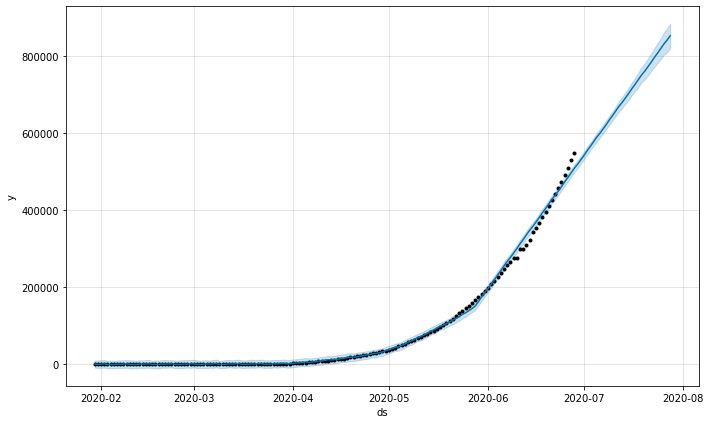

In [15]:
from fbprophet import Prophet
prophet_basic = Prophet()
prophet_basic.fit(dates_confirmed)
future_confirmed = prophet_basic.make_future_dataframe(periods=30)
forecast_confirmed = prophet_basic.predict(future_confirmed)
fig_confirmed = prophet_basic.plot(forecast_confirmed)
forecast_confirmed.tail()

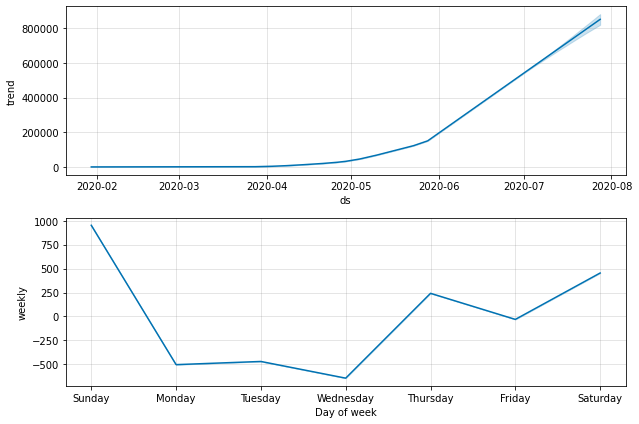

In [16]:
#displaying the various plot by visualizing the components
fig1 = prophet_basic.plot_components(forecast_confirmed)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
176,2020-07-24,25735.966767,24866.042700,26558.005226,24995.905104,26510.124168,1.761654,1.761654,1.761654,1.761654,1.761654,1.761654,0.0,0.0,0.0,25737.728422
177,2020-07-25,26115.653042,25150.567021,27024.746177,25334.770380,26943.242531,-8.815454,-8.815454,-8.815454,-8.815454,-8.815454,-8.815454,0.0,0.0,0.0,26106.837587
178,2020-07-26,26495.339316,25495.861022,27404.203257,25668.409157,27385.559217,-18.676232,-18.676232,-18.676232,-18.676232,-18.676232,-18.676232,0.0,0.0,0.0,26476.663084
179,2020-07-27,26875.025590,25845.231809,27834.867498,26008.099721,27787.711293,-44.994583,-44.994583,-44.994583,-44.994583,-44.994583,-44.994583,0.0,0.0,0.0,26830.031007
180,2020-07-28,27254.711864,26262.067636,28333.047410,26340.765178,28251.787622,30.377192,30.377192,30.377192,30.377192,30.377192,30.377192,0.0,0.0,0.0,27285.089056


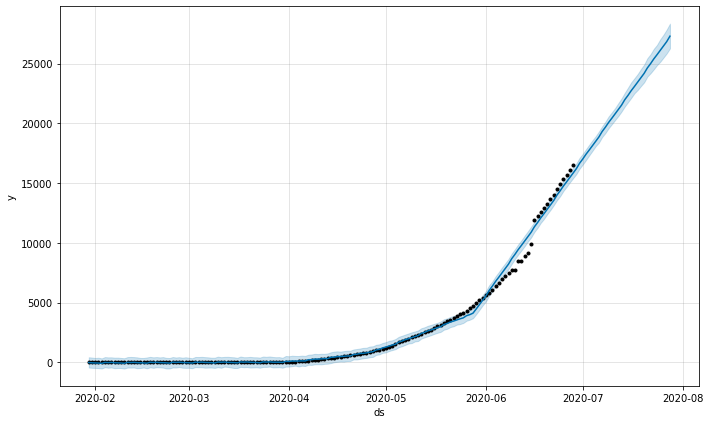

In [17]:
from fbprophet import Prophet
prophet_basic = Prophet()
prophet_basic.fit(dates_deaths)
future_deaths= prophet_basic.make_future_dataframe(periods=30)
forecast_deaths = prophet_basic.predict(future_deaths)
fig_death = prophet_basic.plot(forecast_deaths)
forecast_deaths.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
176,2020-07-24,474423.405960,457361.928974,492560.338291,459646.679645,488622.192167,84.326829,84.326829,84.326829,84.326829,84.326829,84.326829,0.0,0.0,0.0,474507.732789
177,2020-07-25,481644.497800,465451.682871,499811.585018,465867.778121,496780.159317,586.166354,586.166354,586.166354,586.166354,586.166354,586.166354,0.0,0.0,0.0,482230.664153
178,2020-07-26,488865.589639,469791.100860,508692.485603,472015.541292,504826.420063,757.686690,757.686690,757.686690,757.686690,757.686690,757.686690,0.0,0.0,0.0,489623.276329
179,2020-07-27,496086.681479,475927.457679,515040.464621,478325.883724,513060.898733,-438.494430,-438.494430,-438.494430,-438.494430,-438.494430,-438.494430,0.0,0.0,0.0,495648.187050
180,2020-07-28,503307.773319,482100.318092,523475.074074,484474.843456,521206.527477,-439.710821,-439.710821,-439.710821,-439.710821,-439.710821,-439.710821,0.0,0.0,0.0,502868.062498


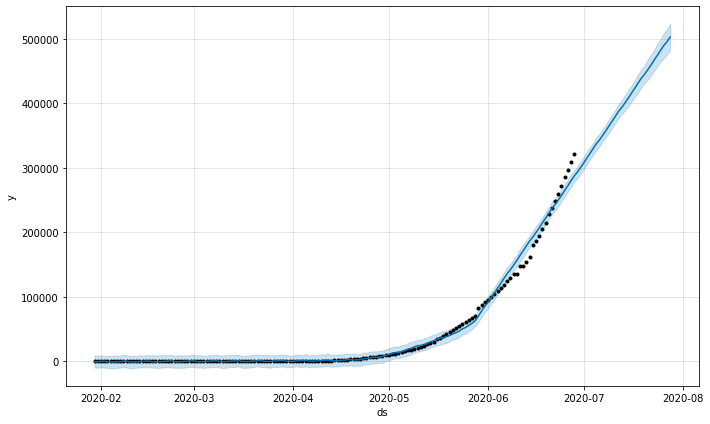

In [18]:
from fbprophet import Prophet
prophet_basic = Prophet()
prophet_basic.fit(dates_recovered)
future_recoverd= prophet_basic.make_future_dataframe(periods=30)
forecast_recovered = prophet_basic.predict(future_recoverd)
fig_recovered = prophet_basic.plot(forecast_recovered)
forecast_recovered.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
176,2020-07-24,301773.162754,293177.403921,310044.920989,293740.281503,309963.631848,-113.269057,-113.269057,-113.269057,-113.269057,-113.269057,-113.269057,0.0,0.0,0.0,301659.893697
177,2020-07-25,305570.734598,296710.959992,314260.616408,297192.365784,314172.375997,-108.303446,-108.303446,-108.303446,-108.303446,-108.303446,-108.303446,0.0,0.0,0.0,305462.431152
178,2020-07-26,309368.306442,300042.168472,318762.098691,300444.559469,318394.759781,251.711719,251.711719,251.711719,251.711719,251.711719,251.711719,0.0,0.0,0.0,309620.018161
179,2020-07-27,313165.878286,303117.931509,322729.949906,303603.435572,322809.209871,-32.201763,-32.201763,-32.201763,-32.201763,-32.201763,-32.201763,0.0,0.0,0.0,313133.676523
180,2020-07-28,316963.450130,306714.695291,327096.727367,306965.453691,327091.188878,-78.277257,-78.277257,-78.277257,-78.277257,-78.277257,-78.277257,0.0,0.0,0.0,316885.172873


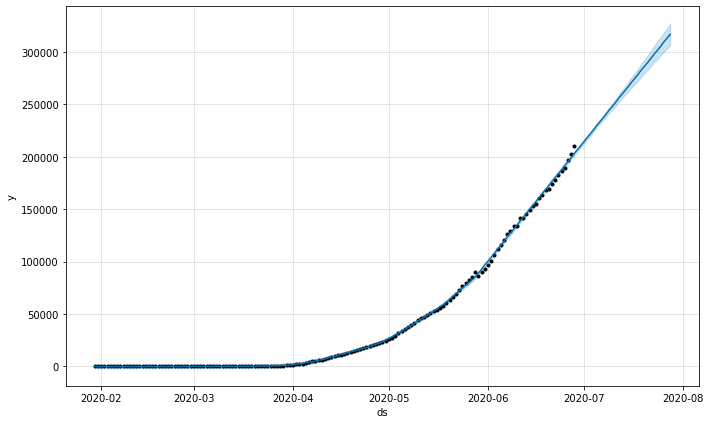

In [19]:
from fbprophet import Prophet
prophet_basic = Prophet()
prophet_basic.fit(dates_active)
future_active= prophet_basic.make_future_dataframe(periods=30)
forecast_active = prophet_basic.predict(future_active)
fig_active = prophet_basic.plot(forecast_active)
forecast_active.tail()

306714.6952905135

In [30]:
#Range for each prediction
result_df=pd.DataFrame([[round(forecast_confirmed["yhat_lower"].iloc[-1]),round(forecast_confirmed["yhat_upper"].iloc[-1])],
             [round(forecast_deaths["yhat_lower"].iloc[-1]),round(forecast_deaths["yhat_upper"].iloc[-1])],
             [round(forecast_recovered["yhat_lower"].iloc[-1]),round(forecast_recovered["yhat_upper"].iloc[-1])],
             [round(forecast_active["yhat_lower"].iloc[-1]),round(forecast_active["yhat_upper"].iloc[-1])]],columns=["Lower Limit","Upper Limit"],index=["Confirmed","Deaths","Recovered","Active"])
result_df

,Lower Limit,Upper Limit
Confirmed,818955.0,883695.0
Deaths,26262.0,28333.0
Recovered,482100.0,523475.0
Active,306715.0,327097.0


In [93]:
predicted_confirmed = forecast_confirmed[["yhat"]]
predicted_recovered = forecast_recovered[["yhat"]]
predicted_active = forecast_active[["yhat"]]
predicted_deaths = forecast_deaths[["yhat"]]
prediction_dates = forecast_confirmed[["ds"]]
prediction_df = pd.concat([prediction_dates,predicted_confirmed,predicted_deaths,predicted_recovered,predicted_active],axis=1)
#rename the columns
prediction_df.columns = ["Date","Confirmed","Deaths","Recovered","Active"]
# plot using plotly
fig_prediction = px.line(prediction_df,x="Date",y=['Recovered', 'Confirmed', 'Deaths','Active'],title="Covid Prediction in India")
fig_prediction.show()

In [91]:
#calculate the recovery/confirmed ratio as on June 28,2020
print("The percentage of people who have recovered as of June 28 are :",round((prediction_df["Recovered"].iloc[-1]/prediction_df["Confirmed"].iloc[-1])*100))
print("The percentage of people who have recovered as of June 28 are :",round((prediction_df["Deaths"].iloc[-1]/prediction_df["Confirmed"].iloc[-1])*100))

The percentage of people who have recovered as of June 28 are : 59.0
The percentage of people who have recovered as of June 28 are : 3.0
